# Recommendation system
<img src='https://media.istockphoto.com/photos/television-streaming-multimedia-wall-concept-picture-id1287677376?b=1&k=20&m=1287677376&s=170667a&w=0&h=wvu0lKn4WbfHtKId83KzrHvGmBP7zn7ZwGEWmU99HWE='>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. 비슷한 영화 추천(cosine similarity)
- 실습은 https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system

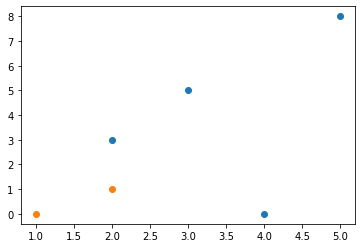

In [11]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
x = np.array([[2, 3], [3, 5], [5, 8], [4,0]])
y = np.array([[1, 0], [2, 1]])
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(y[:, 0], y[:, 1])

In [4]:
pairwise_distances(x, metric='manhattan')

array([[0., 3., 8.],
       [3., 0., 5.],
       [8., 5., 0.]])

In [5]:
pairwise_distances(x, y, metric='manhattan')

array([[ 4.,  2.],
       [ 7.,  5.],
       [12., 10.]])

In [6]:
pairwise_distances(x, metric='euclidean')

array([[0.        , 2.23606798, 5.83095189],
       [2.23606798, 0.        , 3.60555128],
       [5.83095189, 3.60555128, 0.        ]])

In [7]:
pairwise_distances(x, metric='cosine')

array([[0.        , 0.00113186, 0.00043225],
       [0.00113186, 0.        , 0.00016525],
       [0.00043225, 0.00016525, 0.        ]])

In [23]:
data = pd.DataFrame(x).append(pd.DataFrame(y))
data.index =np.arange(0, len(data))
data

,0,1
0,2,3
1,3,5
2,5,8
3,4,0
4,1,0
5,2,1


- [4,0]과 [1,0]/[2,1]의 코사인 유사성에 따른 거리는?
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHFjinj2_lYY-tQ9rTzOiKpwovrfzJ60QXPg&usqp=CAU'>

In [28]:
pd.DataFrame(pairwise_distances(data.iloc[3:, :], metric='cosine'), 
             index=[3,4,5],
             columns=[3,4,5])

,3,4,5
3,0.000000,0.000000,1.055728e-01
4,0.000000,0.000000,1.055728e-01
5,0.105573,0.105573,1.110223e-16


In [34]:
pairwise_distances(np.array([[4,0]]), np.array([[1,0]]), metric='cosine')
pairwise_distances(np.array([[4,0]]), np.array([[2,1]]), metric='cosine')

array([[0.]])

array([[0.10557281]])

### x와 y축이 각각 좋은 단어와 나쁜 단어의 사용 빈도라고 하면 코사인 유사성으로 유유상종을 clustering

In [33]:
pairwise_distances(np.array([[4,0]]), np.array([[1000,0]]), metric='cosine')

array([[0.]])

array([[0.10557281]])

array([[0.]])

# 2. 비슷한 영화 추천(surprise pacakge)
- http://surpriselib.com/ 

In [9]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [3]:
data = Dataset.load_builtin('ml-100k')

### pandas형태로 확인하기

In [4]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
del df["id"]
df.head()

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [5]:
df.set_index(["user", "item"]).head()
df.set_index(["user", "item"]).unstack().head()
df.set_index(["user", "item"]).unstack().stack().head()
df.set_index(["user", "item"]).unstack().stack().reset_index().head()

,,rate
user,item,
196,242,3.0
186,302,3.0
22,377,1.0
244,51,2.0
166,346,1.0


rate                                               ...                    \
item    1   10  100 1000 1001 1002 1003 1004 1005 1006  ...  990 991 992  993   
user                                                    ...                     
1     5.0  3.0  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
10    4.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
100   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  3.0 NaN NaN  NaN   
101   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  NaN   
102   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN NaN  2.0   

                              
item 994 995 996 997 998 999  
user                          
1    NaN NaN NaN NaN NaN NaN  
10   NaN NaN NaN NaN NaN NaN  
100  NaN NaN NaN NaN NaN NaN  
101  NaN NaN NaN NaN NaN NaN  
102  NaN NaN NaN NaN NaN NaN  

[5 rows x 1682 columns]

rate
user item      
1    1      5.0
     10     3.0
     100    5.0
     101    2.0
     102    2.0

,user,item,rate
0,1,1,5.0
1,1,10,3.0
2,1,100,5.0
3,1,101,2.0
4,1,102,2.0


In [6]:
df_table = df.set_index(["user", "item"]).unstack()
df_table.iloc[212:222, 808:817].fillna("")

rate                                        
item  211  212  213  214  215  216  217  218  219
user                                             
290   3.0                      4.0       2.0     
291        4.0       4.0  4.0            4.0  4.0
292                  3.0                         
293   4.0       3.0       4.0  4.0  3.0  2.0     
294                                              
295             5.0       5.0  5.0  4.0  5.0     
296   4.0                                        
297   4.0       3.0       2.0  4.0       3.0     
298   5.0       3.0       5.0                    
299   4.0  4.0  5.0            5.0

<AxesSubplot:xlabel='None-item', ylabel='user'>

Text(0.5, 30.5, 'item')

Text(84.5, 0.5, 'user')

Text(0.5, 1.0, 'Rate Matrix')

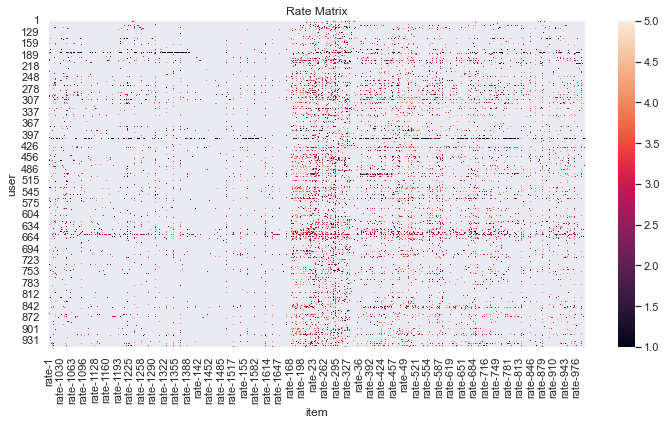

In [32]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

In [8]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=0)
algo = SVD()
algo.fit(trainset)

###  Test 메서드는 사용자-아이템 평점 데이터 세트 전체에 대해서 추천을 수행함
- uid : 유저 아이디
- iid : 아이템 아이디(영화 아이디)
- r_ui : 실제 평점
- est : 예측 평점

In [10]:
predictions = algo.test(testset)
print('prediction type : ', type(predictions), 'size : ', len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type :  <class 'list'> size :  25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.5158435372306425, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.879480645855575, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.229925104344562, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.8886617885537897, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.5357068491135872, details={'was_impossible': False})]

In [11]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:5]]

[('120', '282', 3.5158435372306425),
 ('882', '291', 3.879480645855575),
 ('535', '507', 4.229925104344562),
 ('697', '244', 3.8886617885537897),
 ('751', '385', 3.5357068491135872)]

### 196번 고객이 item 302번을 좋아할 예상 ratings?
- Predict 메서드는 개별 사용자와 개별 영화에 대한 추천 평점을 반환함
- 주의해야할것은 uid와 iid를 문자열로 입력해야함

In [12]:
df[(df['user'] == '196') & (df['user'] == '302')]

,user,item,rate


In [13]:
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.53   {'was_impossible': False}


## 평가결과

In [14]:
accuracy.rmse(predictions)

RMSE: 0.9474


0.9473750866256646

In [16]:
import surprise
from surprise.model_selection import KFold

bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}

algo = surprise.BaselineOnly(bsl_options)

np.random.seed(0)
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
    
acc.mean()

Estimating biases using als...


RMSE: 0.9453
Estimating biases using als...


RMSE: 0.9377
Estimating biases using als...


RMSE: 0.9500


0.9443304984013942

In [18]:
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9358  0.9410  0.9311  0.9367  0.9380  0.9365  0.0033  
MAE (testset)     0.7389  0.7436  0.7326  0.7382  0.7394  0.7385  0.0035  
Fit time          4.56    4.65    4.29    4.41    4.38    4.46    0.13    
Test time         0.17    0.13    0.21    0.11    0.11    0.15    0.04    


{'test_rmse': array([0.93577744, 0.94102771, 0.93105187, 0.93670077, 0.93803345]),
 'test_mae': array([0.73888319, 0.74358171, 0.73255634, 0.73824809, 0.73939477]),
 'fit_time': (4.558516979217529,
  4.65177845954895,
  4.287302255630493,
  4.407911539077759,
  4.380176544189453),
 'test_time': (0.17439699172973633,
  0.12575912475585938,
  0.20869922637939453,
  0.10930466651916504,
  0.11253237724304199)}

# Pandas 파일을 surprise 형태로 전환하여 추천하는 방법

### CSV파일 읽고 로컬에 저장
- surprise는 파일을 읽을때 컬럼명(헤더)가 있으면 안됨
- 그래서 헤더와 인덱스가 없는 csv파일을 ratings_noh.csv로 생성한것
- 순서는 usrID, movieID, rating, timestamp임

In [19]:
ratings = pd.read_csv('https://media.githubusercontent.com/media/hmkim312/datas/main/ml-latest-small/ratings.csv')
ratings.to_csv('../data/ratings_noh.csv', index = False, header = False)

In [20]:
ratings.head()
ratings.shape
ratings.describe()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


(100836, 4)

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## surprise에서 파일 읽기
- rating_scale : 평점값의 최소, 최대 값을 설정

In [23]:
from surprise import Reader
reader = Reader(line_format='user item rating timestamp', sep = ',', rating_scale=(0.5, 5))
data = Dataset.load_from_file('../data/ratings_noh.csv', reader=reader)

In [24]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=0)
algo = SVD(n_factors=50, random_state=13)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8671


0.8671265529441645

In [27]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv = 5, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8686  0.8705  0.8773  0.8750  0.8704  0.8724  0.0033  
MAE (testset)     0.6668  0.6699  0.6764  0.6717  0.6681  0.6706  0.0033  
Fit time          2.64    2.68    2.89    2.77    2.87    2.77    0.10    
Test time         0.23    0.14    0.11    0.21    0.12    0.16    0.05    


{'test_rmse': array([0.86861458, 0.87046181, 0.87733665, 0.8750319 , 0.87040955]),
 'test_mae': array([0.666842  , 0.66990659, 0.67642656, 0.67171531, 0.66810062]),
 'fit_time': (2.638688087463379,
  2.684814929962158,
  2.892225503921509,
  2.7697360515594482,
  2.869211435317993),
 'test_time': (0.22689127922058105,
  0.14279556274414062,
  0.11317968368530273,
  0.2100210189819336,
  0.11585783958435059)}

In [31]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs': [20, 40], 'n_factors': [50]} 
gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE'], cv = 2)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8853482345746445
{'n_epochs': 20, 'n_factors': 50}


# End